# Edge detection
Overview of possible algorithms to detect sharp edges in pixel images.

In [1]:
from context import segmentationtools

import cv2
import math
import numpy as np
import segmentationtools as st
from matplotlib import pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Complete function

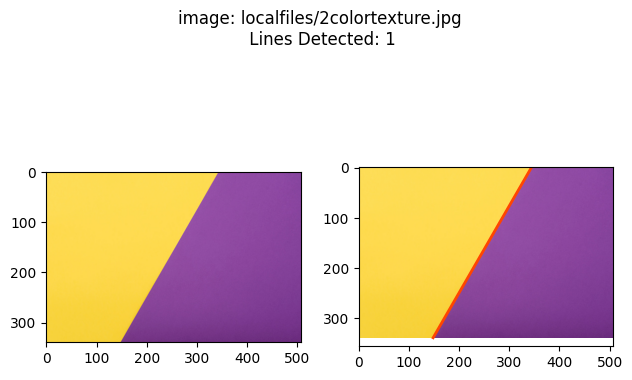

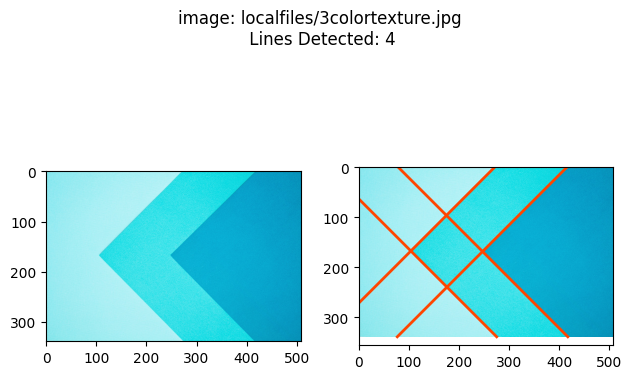

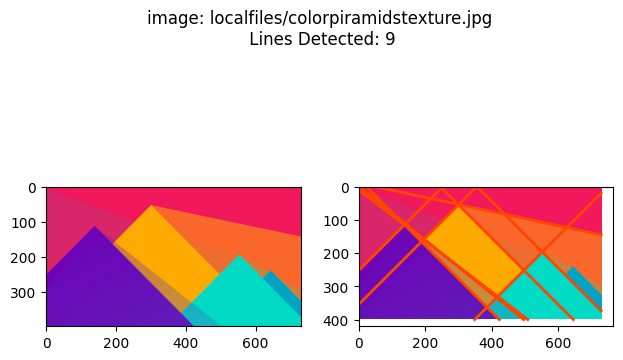

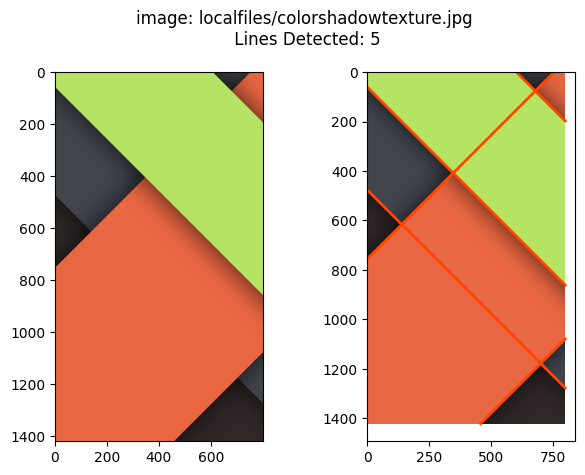

In [3]:
st.show_detected_lines("localfiles/2colortexture.jpg")
st.show_detected_lines("localfiles/3colortexture.jpg")
st.show_detected_lines("localfiles/colorpiramidstexture.jpg")
st.show_detected_lines("localfiles/colorshadowtexture.jpg")

## Image Import

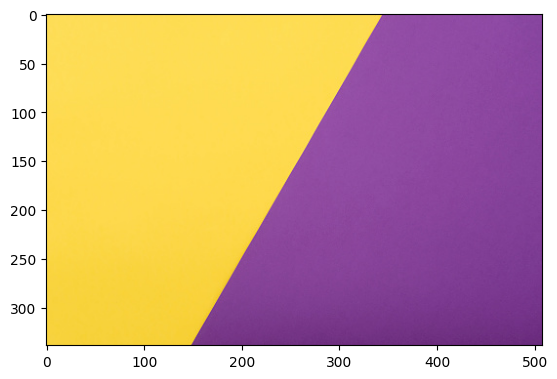

In [4]:
# Import sourse image
img = cv2.imread("localfiles/2colortexture.jpg")
st.show_img(img, True)

## Canny Edge Detection

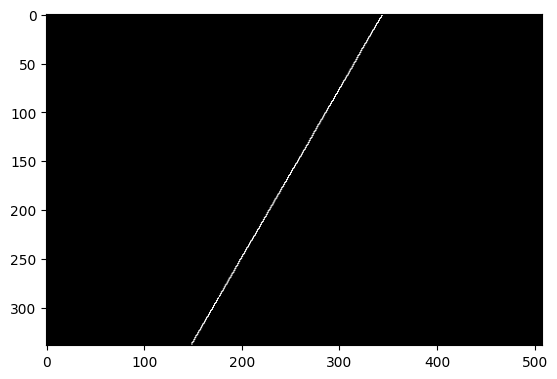

In [5]:
# perform Canny edge tedection to find sharp gradients
dst = cv2.Canny(img, 100, 300, None, 3)
dstp = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

st.show_img(dstp)

## HoughLines

[[[297.75        0.5235988]]]


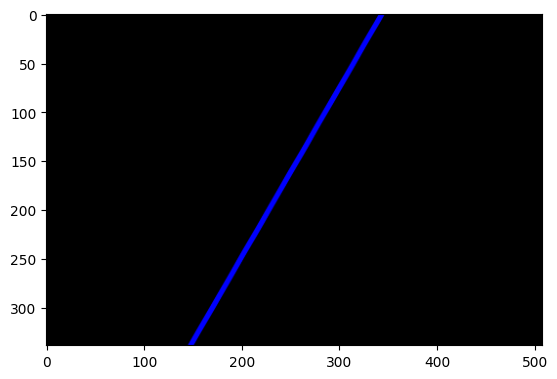

In [6]:

# Lets apply Standard HoughLine transform to detect lines
dstp2 = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(dst, 1.5, np.pi / 120, 150, None, 0, 0)
print(lines)
# Below we will display the result by drawing lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        cv2.line(dstp2, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)

st.show_img(dstp2)


## Get the points at the edges

Edge point values: 
 [[343.81208819   0.        ]
 [148.09034035 339.        ]]


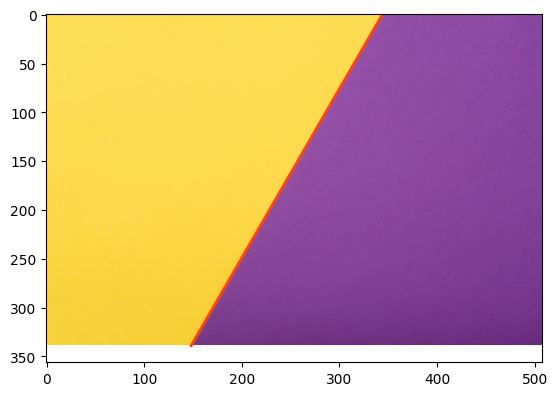

In [7]:
# We are looking for the intersection between the parametric line and the edges of the image, 
# to do this we need to evaluate the line at the edge values 

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for line in lines:
    points = st.get_edge_points(line, img.shape[1], img.shape[0])
    print("Edge point values: \n",points)
    plt.plot(*zip(*points),color='orangered', linewidth=2)
plt.show()

